# Analysis of unstructured data - Assignment 4
## Agata Cegiełka, Damian Matusiak

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import itertools
import collections
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
# from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from bokeh.plotting import from_networkx
import seaborn as sns
import operator
sns.set()

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
url = 'http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html'
request = urlopen(url)
soup = BeautifulSoup(request.read(), 'lxml')
soup

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<title> TU Wroclaw Hugo Steinhaus Center </title>
</head>
<body background="images/tloParma5.gif" marginheight="30" scrolling="yes" topmargin="30">
<hr color="#990000"/>
<h2 align="center"></h2><p align="center"><font face="Verdana" size="5">Publikacje/Publications</font></p>
<hr color="#990000"/><br/><br/><table border="0" cellpadding="2" cellspacing="5" width="100%">
<tr>
<td align="center" width="10%"><b><a href="#Books"><font color="black" face="Verdana" size="2">Books</font></a></b></td>
<td align="center" width="10%"><b><a href="#Theses"><font color="black" face="Verdana" size="2">Theses</font></a></b></td>
<td align="center" width="10%"><b><a href="#Research papers"><font color="black" face="Verdana" size="2">Research papers</font></a></b></td>
<td align="center" width="10%"><b><a href="#Research reports"><font color="black" face

In [4]:
def get_research_papers(lista):
    string = []
    in_class = False
    for i in lista:
        if "Research papers:" in i:
            string.append(i)
            in_class = True
        elif "Research reports:" in i:
            return string
        if in_class:
            string.append(i)

In [5]:
researches_raw = get_research_papers(soup.text.split('\n'))[3:]
researches = []
regex = r'\s[(]199[0-9][)]\s|\s[(]20[0-2][0-9][)]\s'
for research in researches_raw:
    if re.search(regex, research) != None:
        researches.append(research)

researches

['M.Balcerek, K.Burnecki, G.Sikora, A.Wyłomańska (2021) "Discriminating Gaussian processes via quadratic form statistics", \r',
 'Ł.Bielak, A.Grzesiek, J.Janczura, A.Wyłomańska (2021) "Market risk factors analysis for an international mining company. Multi-dimensional, heavy-tailed-based modelling", \r',
 'K.Burnecki, M.Teuerle, A.Wilkowska (2021) "Ruin Probability for the Insurer–Reinsurer Model for Exponential Claims: A Probabilistic Approach", \r',
 'M.Gajowczyk, J.Szwabiński (2021) "Detection of Anomalous Diffusion with Deep\r',
 'J.Gruszka, J.Szwabiński (2021) "Advanced strategies of portfolio management\r',
 'A.Grzesiek, A.Michalak, A.Wyłomańska (2021) "How to describe the linear dependence for heavy-tailed distributed data", \r',
 'A.Grzesiek, R.Połoczański, A.Kumar, A.Wyłomańska (2021) "Moment-based estimation technique for parameters of general inverse subordinator", \r',
 'A.Grzesiek, A.Wyłomańska (2021) "Asymptotics of alternative dependence measures for two-dimensional alph

In [6]:
HSC_employees = set([b.string.replace(" ","") for b in soup.findAll('b')])
HSC_employees

{'A.Fuliński',
 'A.Grzesiek',
 'A.Izydorczyk',
 'A.Janicki',
 'A.Jurlewicz',
 'A.Kumar',
 'A.Makagon',
 'A.Michalak',
 'A.Misiorek',
 'A.Rejman',
 'A.Stanislavsky',
 'A.Weron',
 'A.Wilkowska',
 'A.Wylomanska',
 'A.Wyłomanska',
 'A.Wyłomańska',
 'B.Kozłowska',
 'B.Przybyłowicz',
 'B.Stawiarski',
 'Books',
 'D.Kucharczyk',
 'D.Szarek',
 'E.Broszkiewicz-Suwaj',
 'G.Krzyżanowski',
 'G.Kukla',
 'G.Sikora',
 'G.Zak',
 'G.Żak',
 'H.Loch',
 'H.Loch-Olszewska',
 'H.Olszewska-Loch',
 'J.Gajda',
 'J.Goncerzewicz',
 'J.Gruszka',
 'J.Hebda-Sobkowicz',
 'J.Iwanik',
 'J.Janczura',
 'J.Nowicka',
 'J.Nowicka-Zagrajek',
 'J.Obuchowski',
 'J.Sokołowski',
 'J.Szwabiński',
 'J.Ślęzak',
 'K.Burnecki',
 'K.Maraj',
 'K.Podgórski',
 'M.Balcerek',
 'M.Borgosz-Koczwara',
 'M.Kotulski',
 'M.Kozłowski',
 'M.Magdziarz',
 'M.Małek',
 'M.Muszkieta',
 'M.Teuerle',
 'P.Kokoszka',
 'P.Kowalek',
 'P.Kruczek',
 'P.Miśta',
 'P.Sztuba',
 'P.Wilman',
 'R.Połoczański',
 'R.Weron',
 'Researchpapers',
 'Researchreports',
 'S.On

In [7]:
def removeAccents(input_text):

    strange='ŮôῡΒძěἊἦëĐᾇόἶἧзвŅῑἼźἓŉἐÿἈΌἢὶЁϋυŕŽŎŃğûλВὦėἜŤŨîᾪĝžἙâᾣÚκὔჯᾏᾢĠфĞὝŲŊŁČῐЙῤŌὭŏყἀхῦЧĎὍОуνἱῺèᾒῘᾘὨШūლἚύсÁóĒἍŷöὄЗὤἥბĔõὅῥŋБщἝξĢюᾫაπჟῸდΓÕűřἅгἰშΨńģὌΥÒᾬÏἴქὀῖὣᾙῶŠὟὁἵÖἕΕῨčᾈķЭτἻůᾕἫжΩᾶŇᾁἣჩαἄἹΖеУŹἃἠᾞåᾄГΠКíōĪὮϊὂᾱიżŦИὙἮὖÛĮἳφᾖἋΎΰῩŚἷРῈĲἁéὃσňİΙῠΚĸὛΪᾝᾯψÄᾭêὠÀღЫĩĈμΆᾌἨÑἑïოĵÃŒŸζჭᾼőΣŻçųøΤΑËņĭῙŘАдὗპŰἤცᾓήἯΐÎეὊὼΘЖᾜὢĚἩħĂыῳὧďТΗἺĬὰὡὬὫÇЩᾧñῢĻᾅÆßшδòÂчῌᾃΉᾑΦÍīМƒÜἒĴἿťᾴĶÊΊȘῃΟúχΔὋŴćŔῴῆЦЮΝΛῪŢὯнῬũãáἽĕᾗნᾳἆᾥйᾡὒსᾎĆрĀüСὕÅýფᾺῲšŵкἎἇὑЛვёἂΏθĘэᾋΧĉᾐĤὐὴιăąäὺÈФĺῇἘſგŜæῼῄĊἏØÉПяწДĿᾮἭĜХῂᾦωთĦлðὩზკίᾂᾆἪпἸиᾠώᾀŪāоÙἉἾρаđἌΞļÔβĖÝᾔĨНŀęᾤÓцЕĽŞὈÞუтΈέıàᾍἛśìŶŬȚĳῧῊᾟάεŖᾨᾉςΡმᾊᾸįᾚὥηᾛġÐὓłγľмþᾹἲἔбċῗჰხοἬŗŐἡὲῷῚΫŭᾩὸùᾷĹēრЯĄὉὪῒᾲΜᾰÌœĥტ'

 
    ascii_replacements='UoyBdeAieDaoiiZVNiIzeneyAOiiEyyrZONgulVoeETUiOgzEaoUkyjAoGFGYUNLCiIrOOoqaKyCDOOUniOeiIIOSulEySAoEAyooZoibEoornBSEkGYOapzOdGOuraGisPngOYOOIikoioIoSYoiOeEYcAkEtIuiIZOaNaicaaIZEUZaiIaaGPKioIOioaizTIYIyUIifiAYyYSiREIaeosnIIyKkYIIOpAOeoAgYiCmAAINeiojAOYzcAoSZcuoTAEniIRADypUitiiIiIeOoTZIoEIhAYoodTIIIaoOOCSonyKaAsSdoACIaIiFIiMfUeJItaKEISiOuxDOWcRoiTYNLYTONRuaaIeinaaoIoysACRAuSyAypAoswKAayLvEaOtEEAXciHyiiaaayEFliEsgSaOiCAOEPYtDKOIGKiootHLdOzkiaaIPIIooaUaOUAIrAdAKlObEYiINleoOTEKSOTuTEeiaAEsiYUTiyIIaeROAsRmAAiIoiIgDylglMtAieBcihkoIrOieoIYuOouaKerYAOOiaMaIoht'


    translator=str.maketrans(strange,ascii_replacements)
    
    
    return input_text.translate(translator)

In [8]:
to_df = {"author": [], "year": [], "title": []}
for research in researches:
    splitted = re.split(r'([1-2][0,9][0,1,2,9][0-9])', research, 2)
    author = splitted[0][:-2].replace(" ","").split(',')
    to_df['author'].append(author)
    year_and_title = splitted[-1].split(')')
    to_df['year'].append(splitted[1])
    to_df['title'].append(splitted[2][3:-1])
    
df = pd.DataFrame(to_df)
df

author  year  \
0    [M.Balcerek, K.Burnecki, G.Sikora, A.Wyłomańska]  2021   
1    [Ł.Bielak, A.Grzesiek, J.Janczura, A.Wyłomańska]  2021   
2                [K.Burnecki, M.Teuerle, A.Wilkowska]  2021   
3                         [M.Gajowczyk, J.Szwabiński]  2021   
4                           [J.Gruszka, J.Szwabiński]  2021   
..                                                ...   ...   
547                             [Z.Michna, I.Rychlik]  1995   
548                                         [A.Weron]  1995   
549                                [A.Weron, R.Weron]  1995   
550                [A.Weron, K.Weron, W.A.Woyczynski]  1995   
551    [K.Weron, K.Kosmulski, A.Jurlewicz, Sz.Mercik]  1995   

                                                 title  
0    Discriminating Gaussian processes via quadrati...  
1    Market risk factors analysis for an internatio...  
2    Ruin Probability for the Insurer–Reinsurer Mod...  
3           Detection of Anomalous Diffusion with Deep  
4          Advanced strategies of portfolio management  
..                                                 ...  
547  The expected number of level crossings for cer...  
548  Computer aided modeling and simulation of elec...  
549  Computer simulation of Levy stable variables a...  
550         Relaxation function in dipolar materials",  
551  Levy-stable and extreme value distributions in...  

[552 rows x 3 columns]

In [9]:
for i in df['author']:
    for j in range(len(i)):
        i[j] = removeAccents(i[j])

In [10]:
df['num_of_authors'] = df['author'].str.len()
df

author  year  \
0    [M.Balcerek, K.Burnecki, G.Sikora, A.Wylomanska]  2021   
1    [L.Bielak, A.Grzesiek, J.Janczura, A.Wylomanska]  2021   
2                [K.Burnecki, M.Teuerle, A.Wilkowska]  2021   
3                         [M.Gajowczyk, J.Szwabinski]  2021   
4                           [J.Gruszka, J.Szwabinski]  2021   
..                                                ...   ...   
547                             [Z.Michna, I.Rychlik]  1995   
548                                         [A.Weron]  1995   
549                                [A.Weron, R.Weron]  1995   
550                [A.Weron, K.Weron, W.A.Woyczynski]  1995   
551    [K.Weron, K.Kosmulski, A.Jurlewicz, Sz.Mercik]  1995   

                                                 title  num_of_authors  
0    Discriminating Gaussian processes via quadrati...               4  
1    Market risk factors analysis for an internatio...               4  
2    Ruin Probability for the Insurer–Reinsurer Mod...               3  
3           Detection of Anomalous Diffusion with Deep               2  
4          Advanced strategies of portfolio management               2  
..                                                 ...             ...  
547  The expected number of level crossings for cer...               2  
548  Computer aided modeling and simulation of elec...               1  
549  Computer simulation of Levy stable variables a...               2  
550         Relaxation function in dipolar materials",               3  
551  Levy-stable and extreme value distributions in...               4  

[552 rows x 4 columns]

### Average number of co-authors

In [11]:
np.mean(df['num_of_authors'])

2.704710144927536

### Average number of co-authors in each year

In [12]:
avg_authors_years = df.groupby(['year']).mean()
avg_authors_years

num_of_authors
year                
1995        1.916667
1996        2.166667
1997        2.166667
1998        2.000000
1999        1.916667
2000        2.187500
2001        2.176471
2002        1.555556
2003        2.166667
2004        2.333333
2005        2.444444
2006        2.095238
2007        2.333333
2008        2.280000
2009        2.526316
2010        2.266667
2011        2.428571
2012        2.708333
2013        2.400000
2014        2.850000
2015        3.291667
2016        3.275862
2017        3.256410
2018        2.821429
2019        3.527778
2020        3.416667
2021        3.392857

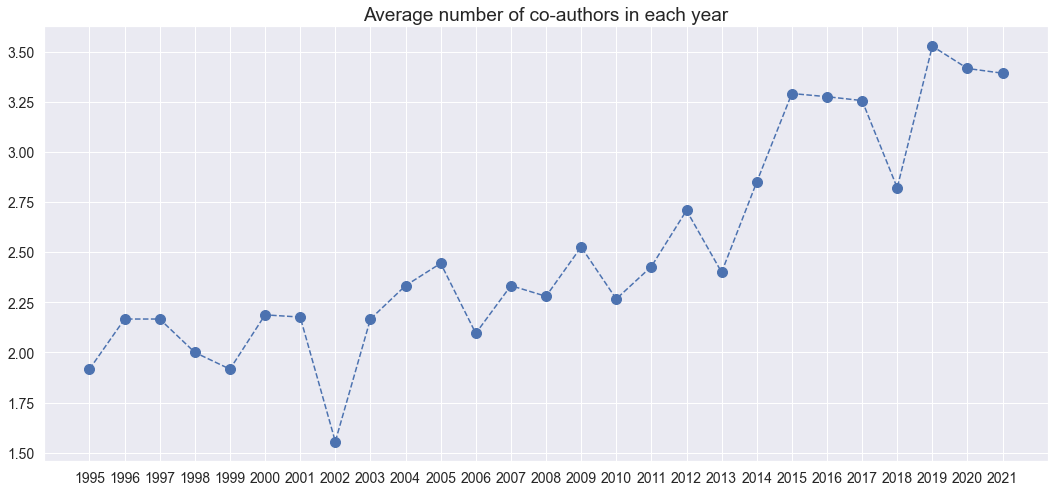

In [13]:
plt.figure(figsize=(18,8))
plt.plot(avg_authors_years,'o',linestyle='--',markersize = 10)
plt.title("Average number of co-authors in each year",fontsize=19)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Within last years, number of cooperations was increasing. We can suspect that now authors can do harder researches or do it more frequently per year with their friends.

### Number of papers per year

In [14]:
papers_per_year = dict(collections.Counter(df.year))
papers_per_year = sorted(papers_per_year.items())

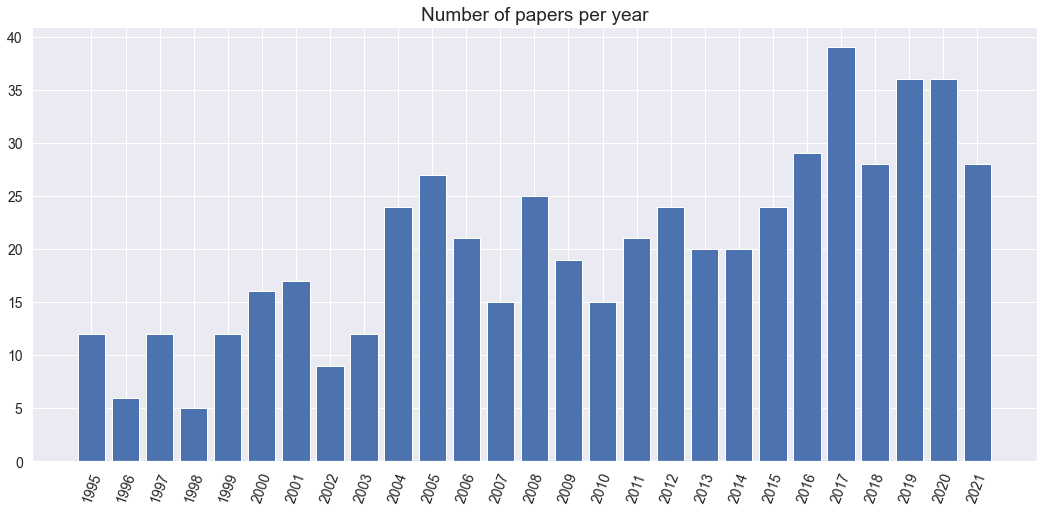

In [15]:
plt.figure(figsize=(18,8))
plt.bar(range(len(papers_per_year)), [val[1] for val in papers_per_year], align='center')
plt.xticks(range(len(papers_per_year)), [val[0] for val in papers_per_year])
plt.xticks(rotation=70,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Number of papers per year",fontsize=19)
plt.show()

Average amount of researches is increasing in last years. It means that scientists are developing their skills and study more.

### Creating links between authors and edges 

In [16]:
authors = list(df['author'])
links = []
for i in authors:
    for pair in itertools.combinations(i,2):
        links.append(pair)

In [17]:
edges = dict(collections.Counter(tuple(sorted(tup)) for tup in links))
print(edges)

{('K.Burnecki', 'M.Balcerek'): 7, ('G.Sikora', 'M.Balcerek'): 5, ('A.Wylomanska', 'M.Balcerek'): 4, ('G.Sikora', 'K.Burnecki'): 11, ('A.Wylomanska', 'K.Burnecki'): 6, ('A.Wylomanska', 'G.Sikora'): 21, ('A.Grzesiek', 'L.Bielak'): 1, ('J.Janczura', 'L.Bielak'): 1, ('A.Wylomanska', 'L.Bielak'): 5, ('A.Grzesiek', 'J.Janczura'): 1, ('A.Grzesiek', 'A.Wylomanska'): 16, ('A.Wylomanska', 'J.Janczura'): 6, ('K.Burnecki', 'M.Teuerle'): 3, ('A.Wilkowska', 'K.Burnecki'): 2, ('A.Wilkowska', 'M.Teuerle'): 2, ('J.Szwabinski', 'M.Gajowczyk'): 1, ('J.Gruszka', 'J.Szwabinski'): 2, ('A.Grzesiek', 'A.Michalak'): 1, ('A.Michalak', 'A.Wylomanska'): 12, ('A.Grzesiek', 'R.Poloczanski'): 1, ('A.Grzesiek', 'A.Kumar'): 1, ('A.Kumar', 'R.Poloczanski'): 4, ('A.Wylomanska', 'R.Poloczanski'): 6, ('A.Kumar', 'A.Wylomanska'): 10, ('A.Grzesiek', 'R.Zimroz'): 3, ('A.Grzesiek', 'P.Sliwinski'): 2, ('A.Grzesiek', 'N.Gomolla'): 2, ('P.Sliwinski', 'R.Zimroz'): 2, ('N.Gomolla', 'R.Zimroz'): 2, ('A.Wylomanska', 'R.Zimroz'): 55,

### Most popular pair

In [18]:
sorted_edges = dict( sorted(edges.items(), key=operator.itemgetter(1),reverse=True))

pd.DataFrame(sorted_edges.items(),columns=['pair of authors', 'nr of collaborations'])[:10]

pair of authors  nr of collaborations
0      (A.Wylomanska, R.Zimroz)                    55
1         (A.Weron, K.Burnecki)                    31
2      (A.Wylomanska, G.Sikora)                    21
3       (A.Wylomanska, J.Gajda)                    20
4  (A.Wylomanska, J.Obuchowski)                    20
5      (J.Obuchowski, R.Zimroz)                    19
6        (A.Weron, M.Magdziarz)                    19
7        (A.Jurlewicz, K.Weron)                    18
8    (A.Grzesiek, A.Wylomanska)                    16
9         (A.Misiorek, R.Weron)                    14

The most popular pair - the pair with the biggest number of collaborations - is A.Wyłomańska and R.Zimroz. They have written together 55 reaserch papers. 

### Creating table with number of publications for all authors

In [19]:
df1 = df.explode('author')
df1 = df1.drop(columns=['num_of_authors'])

In [20]:
if_HSC = []
for author in df1['author']:
    if author in HSC_employees:
        if_HSC.append("HSC")
    else:
        if_HSC.append("other")
df1['if_HSC'] = if_HSC
df1

author  year                                              title  \
0        M.Balcerek  2021  Discriminating Gaussian processes via quadrati...   
0        K.Burnecki  2021  Discriminating Gaussian processes via quadrati...   
0          G.Sikora  2021  Discriminating Gaussian processes via quadrati...   
0      A.Wylomanska  2021  Discriminating Gaussian processes via quadrati...   
1          L.Bielak  2021  Market risk factors analysis for an internatio...   
..              ...   ...                                                ...   
550  W.A.Woyczynski  1995         Relaxation function in dipolar materials",   
551         K.Weron  1995  Levy-stable and extreme value distributions in...   
551     K.Kosmulski  1995  Levy-stable and extreme value distributions in...   
551     A.Jurlewicz  1995  Levy-stable and extreme value distributions in...   
551       Sz.Mercik  1995  Levy-stable and extreme value distributions in...   

    if_HSC  
0      HSC  
0      HSC  
0      HSC  
0      HSC  
1    other  
..     ...  
550  other  
551  other  
551  other  
551    HSC  
551  other  

[1493 rows x 4 columns]

In [21]:
num_of_papers_dict = dict(collections.Counter(df1.author))
num_of_papers_table = pd.DataFrame.from_dict(num_of_papers_dict,orient='index',columns=['num_of_papers'])
num_of_papers_table

num_of_papers
M.Balcerek               10
K.Burnecki               81
G.Sikora                 34
A.Wylomanska            158
L.Bielak                  5
...                     ...
A.Rejman                  1
S.Cambanis                1
K.Podgorski               1
A.Gross                   1
I.Rychlik                 1

[292 rows x 1 columns]

### Most frequent persons

In [22]:
num_of_papers_table.sort_values('num_of_papers', ascending=False)[:10]

num_of_papers
A.Wylomanska            158
A.Weron                  98
R.Weron                  84
K.Burnecki               81
M.Magdziarz              69
R.Zimroz                 55
K.Weron                  37
A.Jurlewicz              36
G.Sikora                 34
J.Janczura               31

Above table shows ten authors with the biggest number of publications. They average publishing rate is more than 1 research per year. 

### Authors from W13 vs other faculties

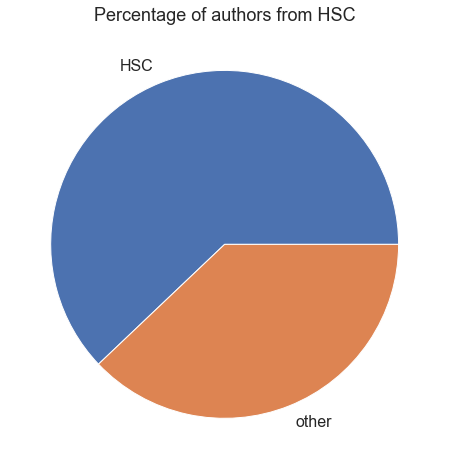

In [23]:
fac = dict(collections.Counter(df1.if_HSC))

labels = list(fac.keys())
values = list(fac.values())

plt.figure(figsize=(18,8))
plt.pie(values, labels=labels, textprops={'fontsize': 16})
plt.title('Percentage of authors from HSC', fontsize=18)
plt.show()

Scientists cooperate not only with people from the Hugo Science Center. A big part of research authors are people from unknown Science Center.

### Creating table with edges and weights


In the table column weight is the number of papers that pair of authors wrote together.

In [24]:
edges_df = pd.Series(edges).reset_index()   
edges_df.columns = ['author1', 'author2', 'weight']   
edges_df

author1         author2  weight
0      K.Burnecki      M.Balcerek       7
1        G.Sikora      M.Balcerek       5
2    A.Wylomanska      M.Balcerek       4
3        G.Sikora      K.Burnecki      11
4    A.Wylomanska      K.Burnecki       6
..            ...             ...     ...
808     I.Rychlik        Z.Michna       1
809       A.Weron  W.A.Woyczynski       1
810       K.Weron  W.A.Woyczynski       1
811   K.Kosmulski       Sz.Mercik       1
812   A.Jurlewicz       Sz.Mercik       1

[813 rows x 3 columns]

### Creating graph

In [25]:
G = nx.from_pandas_edgelist(edges_df, 'author1', 'author2', 'weight')

In [26]:
nx.set_node_attributes(G, name='num_of_papers', values=num_of_papers_dict)

In [ ]:
size_by_this_attribute = 'num_of_papers'
color_by_this_attribute = 'num_of_papers'

color_palette = Purples8

title = 'Hugo Steinhaus Center'

HOVER_TOOLTIPS = [
       ("Author", "@index"),
        ("Number of papers", "@num_of_papers")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)


### Degree centrality for each node

In [171]:
centrality = nx.degree_centrality(G)

sorted_centrality = dict( sorted(centrality.items(), key=operator.itemgetter(1),reverse=True))

pd.DataFrame.from_dict(sorted_centrality,orient='index',columns=['centrality'])

centrality
A.Wylomanska      0.326316
K.Burnecki        0.224561
A.Weron           0.224561
R.Weron           0.161404
J.Janczura        0.147368
...                    ...
L.J.Wojakowski    0.003509
J.Nowicka         0.003509
M.Kotulski        0.003509
A.Gross           0.003509
I.Rychlik         0.003509

[286 rows x 1 columns]

On the top of the above table we see that in the center of the graph is A.Wylomanska. She has the biggest number of various cooperations with others. In simple interpretation this measure tell us, how varied cooperations the author has. 

### Betweenness centrality for each node

In [174]:
b_centrality = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(b_centrality,orient='index',columns=['betweeness centrality'])

betweeness centrality
K.Burnecki                 0.303318
M.Balcerek                 0.008072
G.Sikora                   0.027525
A.Wylomanska               0.318910
A.Grzesiek                 0.005491
...                             ...
M.Kotulski                 0.000000
K.Podgorski                0.000000
S.Cambanis                 0.000000
A.Gross                    0.000000
I.Rychlik                  0.000000

[286 rows x 1 columns]

This parameter tell us the amount of influence an author has over the flow of information in a graph. The authors that are on the top are more frequently on shortest paths between other authors. These authors can be bridges of the network. Authors with 0 betweeness centrality has usually co-authors. 

## Summary

- The site with research papers and authors is bad. We had to use specific regular expression commands to pull out the data.
- A.Wyłomańska has written the most number of researches. She stands out over the all other scientists in almost every aspect of our analysis. 
- Number of researches and cooperations are increasing in last years.